In [1]:
#!pip install Jinja2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("../../data/preprocessed/fbh_warme_weather.csv",delimiter=',',encoding='UTF-8')

In [4]:
def timestamp_to_datetime(timestamp):
    return datetime.datetime.fromisoformat(timestamp)
    

In [5]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [6]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [7]:
df = df[['timestamp','fbh_warme','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [8]:
df

,timestamp,fbh_warme,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 00:15:00,0.0,4.32137,0.0000,0.000000,0.000000,73.0,1,14,6,2021,0
1,2021-06-14 00:30:00,0.0,4.30637,0.0000,0.000000,0.000000,71.0,1,14,6,2021,0
2,2021-06-14 00:45:00,0.0,4.29137,0.0000,0.000000,0.000000,69.0,1,14,6,2021,0
3,2021-06-14 01:00:00,0.0,4.27637,0.0000,0.000000,0.000000,67.0,1,14,6,2021,1
4,2021-06-14 01:15:00,1.0,4.26137,0.0000,0.000000,0.000000,65.0,1,14,6,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39600,2022-07-31 12:15:00,0.0,9.17137,461.9100,275.060550,186.849460,42.0,0,31,7,2022,12
39601,2022-07-31 12:30:00,0.0,9.68387,476.8175,285.217105,191.600403,41.5,0,31,7,2022,12
39602,2022-07-31 12:45:00,0.0,10.19637,491.7250,295.373660,196.351345,41.0,0,31,7,2022,12
39603,2022-07-31 13:00:00,0.0,10.70887,506.6325,305.530215,201.102287,40.5,0,31,7,2022,13


In [9]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_14823/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,fbh_warme,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
fbh_warme,1.000000,0.608318,0.015173,0.014090,0.015964,-0.129506,0.200750,-0.026995,0.026190,-0.046236,-0.103726
Graz Temperature [2 m elevation corrected],0.608318,1.000000,0.449381,0.430731,0.449502,-0.446133,0.227950,0.015103,-0.045070,-0.009691,0.149404
Graz Shortwave Radiation,0.015173,0.449381,1.000000,0.985019,0.954317,-0.573919,0.019900,-0.004311,0.092370,-0.110583,0.193183
Graz Direct Shortwave Radiation,0.014090,0.430731,0.985019,1.000000,0.888494,-0.565269,0.014027,-0.001336,0.084000,-0.103092,0.176527
Graz Diffuse Shortwave Radiation,0.015964,0.449502,0.954317,0.888494,1.000000,-0.547790,0.028650,-0.009156,0.100255,-0.115641,0.208202
Graz Relative Humidity [2 m],-0.129506,-0.446133,-0.573919,-0.565269,-0.547790,1.000000,-0.092792,0.011600,0.009926,-0.071975,-0.284009
is_schoolday,0.200750,0.227950,0.019900,0.014027,0.028650,-0.092792,1.000000,-0.074512,-0.128979,0.148342,0.001102
day,-0.026995,0.015103,-0.004311,-0.001336,-0.009156,0.011600,-0.074512,1.000000,0.006387,-0.041626,-0.001779
month,0.026190,-0.045070,0.092370,0.084000,0.100255,0.009926,-0.128979,0.006387,1.000000,-0.798305,-0.000153
year,-0.046236,-0.009691,-0.110583,-0.103092,-0.115641,-0.071975,0.148342,-0.041626,-0.798305,1.000000,-0.001049


In [10]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['fbh_warme']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting fbh_warme DTR model

### Decision Tree Regressor

In [12]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [14]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set 0.92


<Figure size 640x480 with 0 Axes>

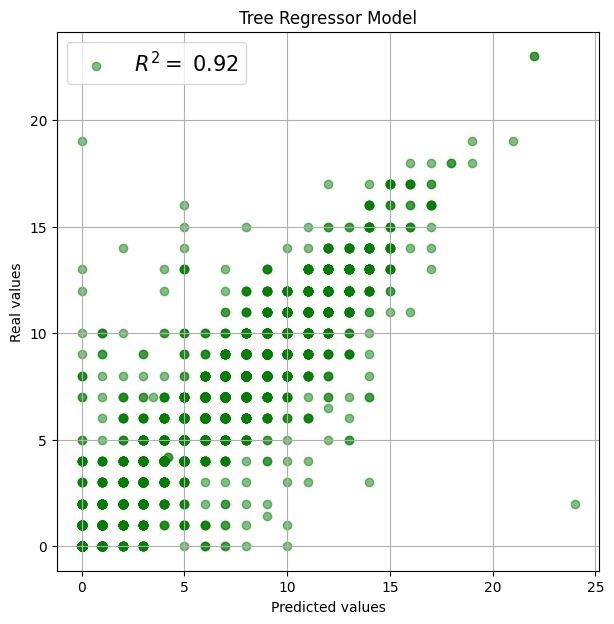

In [15]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [16]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Graz Temperature [2 m elevation corrected],31684.0,11.794610,9.047946,-8.69863,3.59637,11.937619,19.414495,32.621372
Graz Shortwave Radiation,31684.0,158.211045,221.054452,0.00000,0.00000,14.685000,279.460000,901.570000
Graz Direct Shortwave Radiation,31684.0,93.979377,143.873572,-6.14830,0.00000,3.788804,156.628118,612.543100
Graz Diffuse Shortwave Radiation,31684.0,64.231667,83.199350,0.00000,0.00000,7.037518,126.589439,296.138655
Graz Relative Humidity [2 m],31684.0,63.773150,14.692589,24.00000,53.00000,63.000000,74.000000,98.000000
is_schoolday,31684.0,0.514581,0.499795,0.00000,0.00000,1.000000,1.000000,1.000000
day,31684.0,15.969385,8.774535,1.00000,8.00000,16.000000,24.000000,31.000000
month,31684.0,6.543397,3.255180,1.00000,4.00000,7.000000,9.000000,12.000000
hour,31684.0,11.493467,6.912604,0.00000,5.00000,11.000000,17.000000,23.000000


In [17]:
test_df = X_test
test_df['fbh_warme_pred'] = DTRPred
test_df['fbh_warme_real'] = y_test

In [18]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,fbh_warme_pred,fbh_warme_real
32128,4.471370,194.020,106.979740,87.040270,55.00,0,14,5,16,0.0,0.0
21385,25.906370,331.080,198.166172,132.913837,46.50,0,22,1,18,7.0,6.0
2992,4.031370,0.000,0.000000,0.000000,68.00,0,15,7,4,0.0,0.0
18586,25.701370,804.115,554.803085,249.311900,40.50,0,24,12,14,0.0,1.0
19111,19.656371,0.000,0.000000,0.000000,57.00,0,30,12,2,13.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
35625,0.268870,0.000,0.000000,0.000000,55.00,1,20,6,2,0.0,0.0
33977,4.381370,0.000,0.000000,0.000000,70.25,1,2,6,22,0.0,0.0
22571,22.251370,0.000,0.000000,0.000000,52.75,1,4,2,3,11.0,10.0
2865,6.828870,0.000,0.000000,0.000000,67.00,0,13,7,20,0.0,0.0
